In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
mydata = pd.read_csv("https://raw.githubusercontent.com/MSc-in-Data-Science/class_material/master/semester_1/Machine_Learning/datasets/digit_recognizer_dataset.csv")

df=pd.DataFrame(mydata)
#print(df.head(20))
#sampledf = df.head(10000)
array = df.values
X = array[1:,1:]
Y = array[1:,0]


In [2]:
pixels = pd.DataFrame(X)
labels = pd.DataFrame(Y)

In [3]:
pixels.loc[0].values
labels.loc[0].values

array([0])

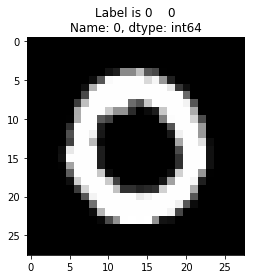

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
label = labels.loc[0]
pixel = pixels.loc[0]
pixel = np.array(pixel, dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
K= 30
metric='euclidean'
KnnModel = KNeighborsClassifier(K, weights='uniform',metric=metric)
KnnModel.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [7]:
y_pred = KnnModel.predict(X_test)

In [8]:
KnnModel.score(X_test, y_test)

0.9478571428571428

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9478571428571428

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_pred = model.predict(X_test)

In [12]:
model.score(X_test, y_test)

0.9335714285714286

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9335714285714286

In [14]:
y_test[0]

9

In [15]:
y_predicted = model.predict(X_test[0].reshape(1,-1))

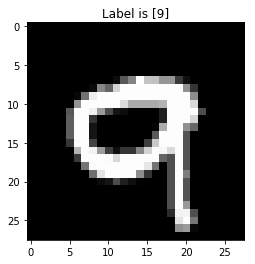

In [16]:
label = y_predicted
pixel = X_test[0]
pixel = np.array(pixel, dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')
plt.show()

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9649039283729686


In [18]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [19]:
# linear model
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [20]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))



accuracy: 0.9065873015873016 

[[1200    0    6    1    1    7    8    0    3    1]
 [   0 1401    5    6    2    2    2    2   10    1]
 [  14   13 1148   26   14    4    8   15   20    2]
 [   8    5   53 1151    3   41    1   14   33    5]
 [   2    5   15    2 1081    2    4    2    1   54]
 [  18   11   10   59    9  974   18    5   16    7]
 [  14    4   11    0   19   19 1160    0    3    0]
 [   3   10   24   10   27    1    0 1189    6   68]
 [  26   23   30   36    7   48    6   11 1039   15]
 [  10    5    9   24   59    4    1   66    2 1080]]


In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


accuracy: 0.9364285714285714 

[[1201    0    4    1    1    7   10    1    1    1]
 [   0 1402   11    1    3    2    2    6    3    1]
 [   4    7 1192   10    6    0    6   21   17    1]
 [   1    6   33 1198    0   20    2   31   19    4]
 [   1    4   16    0 1094    2    4   11    0   36]
 [   3    4    4   35    8 1022   20   14   11    6]
 [   9    3    3    0    7   12 1182   12    2    0]
 [   3   11   13    4   12    1    0 1256    5   33]
 [  13   18   14   16    5   29    7   15 1115    9]
 [   6    4    7   26   23    2    0   49    6 1137]]


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 79.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,177.415559,8.859309,21.600036,1.523224,5,0.01,"{'C': 5, 'gamma': 0.01}",0.758929,0.750595,0.764286,...,0.761162,0.006167,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,40.031973,2.007918,10.927486,0.610094,5,0.001,"{'C': 5, 'gamma': 0.001}",0.938690,0.941667,0.960119,...,0.946898,0.007685,1,0.996726,0.995089,0.995684,0.996726,0.995685,0.995982,0.000645
2,36.148721,2.018455,11.585330,0.470329,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.919048,0.925000,0.939881,...,0.927610,0.008056,4,0.956095,0.953267,0.949546,0.953713,0.951637,0.952852,0.002183
3,198.535695,15.654330,22.183214,1.676323,10,0.01,"{'C': 10, 'gamma': 0.01}",0.758929,0.750595,0.764286,...,0.761162,0.006167,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,35.294062,1.635734,10.506175,0.653413,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937500,0.942262,0.958333,...,0.945946,0.007870,2,0.998958,0.999256,0.999256,0.999256,0.998810,0.999107,0.000188
5,27.657987,1.097866,10.077053,0.553775,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.922024,0.927976,0.945238,...,0.932135,0.007867,3,0.965471,0.963239,0.959815,0.963834,0.962946,0.963061,0.001843


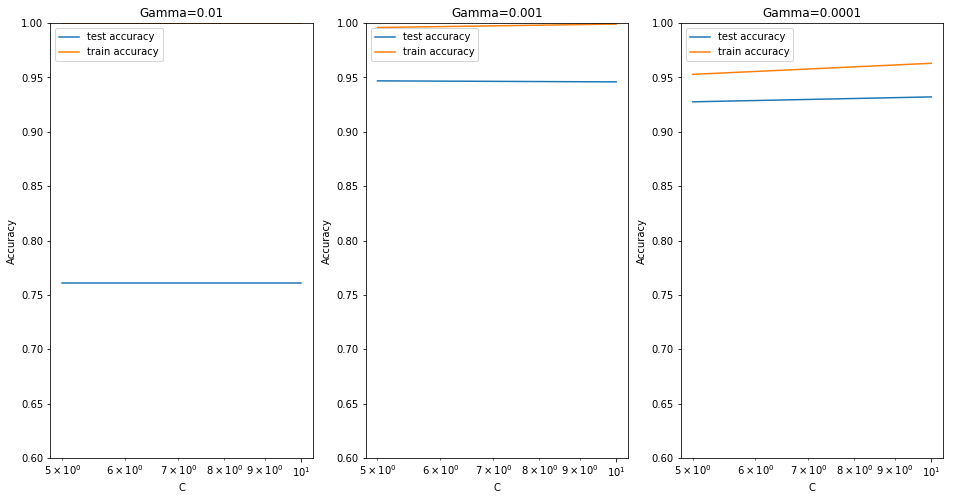

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


The best test score is 0.9468984402905107 corresponding to hyperparameters {'C': 5, 'gamma': 0.001}


In [27]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9455555555555556 

[[1206    0    5    1    0    5    8    1    0    1]
 [   0 1406    5    6    2    0    2    6    4    0]
 [   4    9 1198   10    2    0    4   20   15    2]
 [   0    0   23 1225    3   15    2   27   15    4]
 [   1    1   22    1 1105    1    2    7    0   28]
 [   9    4    6   31    7 1030   17   11    8    4]
 [  10    1    6    0    4   12 1184   11    2    0]
 [   3    7   12    4   17    0    0 1272    4   19]
 [  13   11   15   11    3   23    7   14 1134   10]
 [   6    4    6   20   18    4    0   45    3 1154]] 



In [3]:
from sklearn.model_selection import train_test_split
from time import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_PCA = X 
Y_PCA = Y
X_tr, X_ts, y_tr, y_ts = train_test_split(X_PCA, Y_PCA, test_size=0.30, random_state=7)

In [4]:
n_components = 154
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_PCA)
print("done in %0.3fs" % (time() - t0))

X_pca_trans = pca.transform(X_PCA)

done in 6.800s


0.9500682676786921

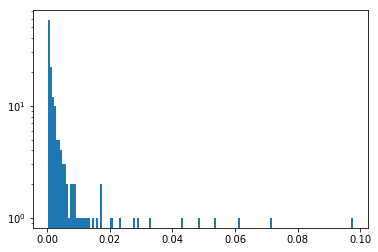

In [5]:
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import math
plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()




In [ ]:
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
#param_grid = { "C" : [10]
#              , "gamma" : [0.01]}
#rf = SVC()
##gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
#gs = gs.fit(X_pca_trans , Y_PCA)

#print(gs.best_score_)
#print(gs.best_params_)

In [7]:
#bp = gs.best_params_
from sklearn.svm import SVC
t0 = time()
clf = SVC(C=10, kernel='rbf', gamma=0.001)
clf = clf.fit(X_pca_trans, Y_PCA)
print("done in %0.3fs" % (time() - t0))


done in 188.880s


In [8]:
clf.score(pca.transform(X_ts), y_ts)

0.988015873015873